# Upward and Downward Continuation

### **This notebook ilustrate how to get an upward continuated data and it shows the differences between calculated the filtered data using Simple Fourier Domain and the function from Fatiando.**

** The simple gravity data in Fourier Domain can be expressed by using the Fourier Transform as follow:**

# $$\mathcal{F}\left[G(x,y)\right] = \int G(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

**where $G(x)$ is the simple gravity data in the space domain.**

** The continuation filter expression is given by:**
# $$ \mathcal{K}(u,v) = e^{-h \,(k_{x}^2 + k_{y}^2)^{\frac{1}{2}}}$$

**where $h = d - z$ is the difference between the new level of observation $d$ and the original observation height $z$; $k_x$ and $k_y$ are the wavenumber in $X$ and $Y$ directions; and $\mathcal{K}$ is the filter which will be applied on the gravity data.**

**The exponential can be positive or negative:**
* $d > z \rightarrow\, h > 0$ - upward continuation;
* $d < z \rightarrow\, h < 0$ - downward continuation.


**The continuated data is obtained by multiplying the filter $\mathcal{K}$ and the gravity transformed data $G(k)$. After that, it should be applied the inverse Fourier transform on the continuated data for return on the gravity data in space domain.**

In [12]:
# Copying all usefull libraries
import numpy as np
import gravmag as gmc
import datafiltering as df
import matplotlib.pyplot as plt

## Example 1 - Magnetic data

In [13]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-3000., 3000., npts)
y = np.copy(x)
z = -20.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [14]:
#Informations about the rectangular prisms that we will use
prism1 = [-2000., 2000., -2000., 2000., 1000., 3000., 1.]
prism2 = [-3000., 3000., -3000., 3000., 3000., 6000., 1.]

# Informations about the values for inclination and declination
direc1 = [45., 20]
direc2 = [45., 20.]
field = [55., -48.]
# Here we assume that both prism have the same inc and dec

In [15]:
# Calculate the total field anomaly
tfa1 = gmc.prism_tf(X, Y, z, prism1, direc1, field)
tfa2 = gmc.prism_tf(X, Y, z, prism2, direc2, field)
tfa = tfa1 + tfa2

H is positive. Continuation is Upward!


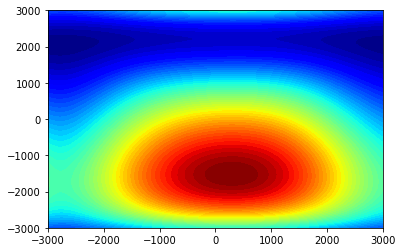

In [16]:
up = df.continuation(X, Y, tfa, 500)
plt.figure()
plt.contourf(Y, X, up, 50, cmap = plt.cm.jet)
plt.show()

In [17]:
#Calculating the wavenumbers
u = 2.0*np.pi* np.fft.fftfreq(tfa.shape[0], x[1] - x[0])
v = 2.0*np.pi* np.fft.fftfreq(tfa.shape[1], y[1] - y[0])
U,V = np.meshgrid(u,v)
# Filtering the data
D = 500. # meters # H = 2000 - z > 0 - UPWARD!
TFA = np.fft.fft2(tfa) # Fourier transform for total field
K_up = np.exp(-(D-z)*(np.sqrt(U**2 + V**2))) # Filter calculation
TFA_cont = TFA*K_up # Applieding the filter
TFA_up = (np.fft.ifft2(TFA_cont)) # Applieding the inverse Fourier

In [18]:
'''
# Defines the valus for colorbar
print 'Minimum and maximum - first prism:', np.min(tfa1), '/', np.max(tfa1)
print 'Minimum and maximum - second prism:', np.min(tfa2),  '/', np.max(tfa2)
print 'Minimum and maximum - both prisms:', np.min(tfa),  '/', np.max(tfa)
print 'Minimum and maximum - upward data:', np.min(TFA_up),  '/', np.max(TFA_up)
values = [np.min(tfa1), np.max(tfa1), 
          np.min(tfa2), np.max(tfa2), 
          np.min(tfa), np.max(tfa), 
          np.min(TFA_up), np.max(TFA_up)]
print np.min(values)
print np.max(values)

# Defining the colorbar
vcor = np.linspace(tfa.min(), tfa.max(), 200)
'''

"\n# Defines the valus for colorbar\nprint 'Minimum and maximum - first prism:', np.min(tfa1), '/', np.max(tfa1)\nprint 'Minimum and maximum - second prism:', np.min(tfa2),  '/', np.max(tfa2)\nprint 'Minimum and maximum - both prisms:', np.min(tfa),  '/', np.max(tfa)\nprint 'Minimum and maximum - upward data:', np.min(TFA_up),  '/', np.max(TFA_up)\nvalues = [np.min(tfa1), np.max(tfa1), \n          np.min(tfa2), np.max(tfa2), \n          np.min(tfa), np.max(tfa), \n          np.min(TFA_up), np.max(TFA_up)]\nprint np.min(values)\nprint np.max(values)\n\n# Defining the colorbar\nvcor = np.linspace(tfa.min(), tfa.max(), 200)\n"

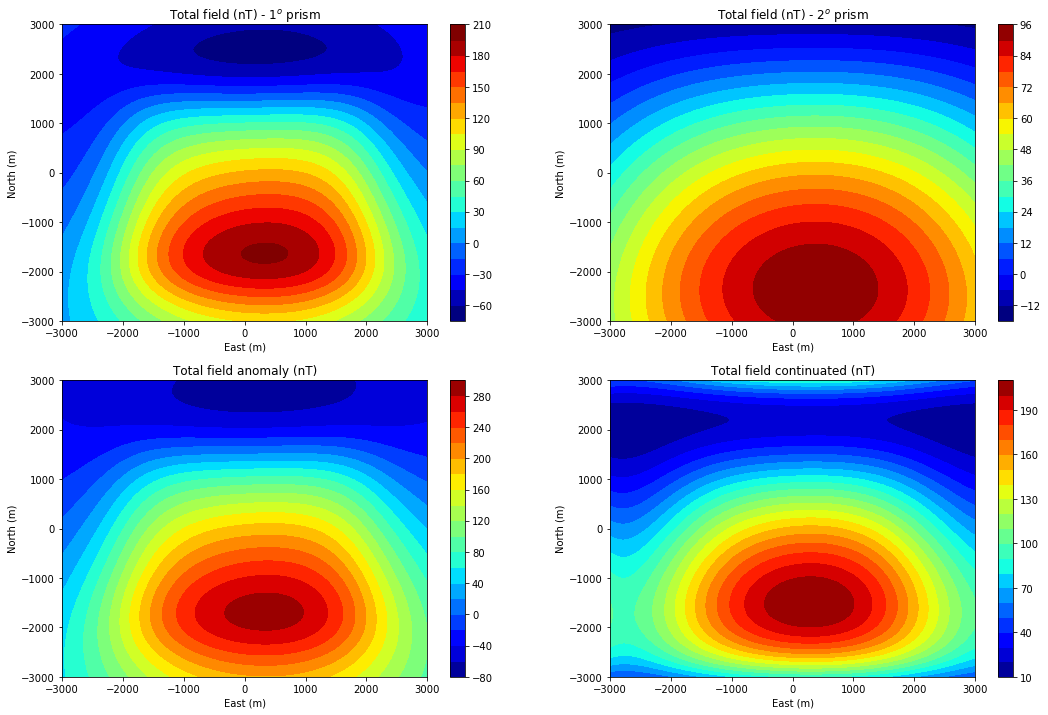

In [21]:
# Plot the map for total field anomaly
plt.close('all')
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Total field (nT) - $1^o$ prism')
fig1 = plt.contourf(Y, X, tfa1, 20, vmin = np.min(tfa1), vmax = np.max(tfa1), cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb1 = plt.colorbar(fig1)
cb2lim = plt.clim(np.min(tfa1), np.max(tfa1))

plt.subplot(2,2,2)
plt.title('Total field (nT) - $2^o$ prism')
fig2 = plt.contourf(Y, X, tfa2, 20, cmap = plt.cm.jet, vmin = np.min(tfa2), vmax = np.max(tfa2))
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb2 = plt.colorbar(fig2)
cb2lim = plt.clim(np.min(tfa2), np.max(tfa2))

plt.subplot(2,2,3)
plt.title('Total field anomaly (nT)')
fig3 = plt.contourf(Y, X, tfa, 20, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb3 = plt.colorbar(fig3)

plt.subplot(2,2,4)
plt.title('Total field continuated (nT)')
fig4 = plt.contourf(Y, X, TFA_up, 20, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
cb4 = plt.colorbar(fig4)

plt.show()

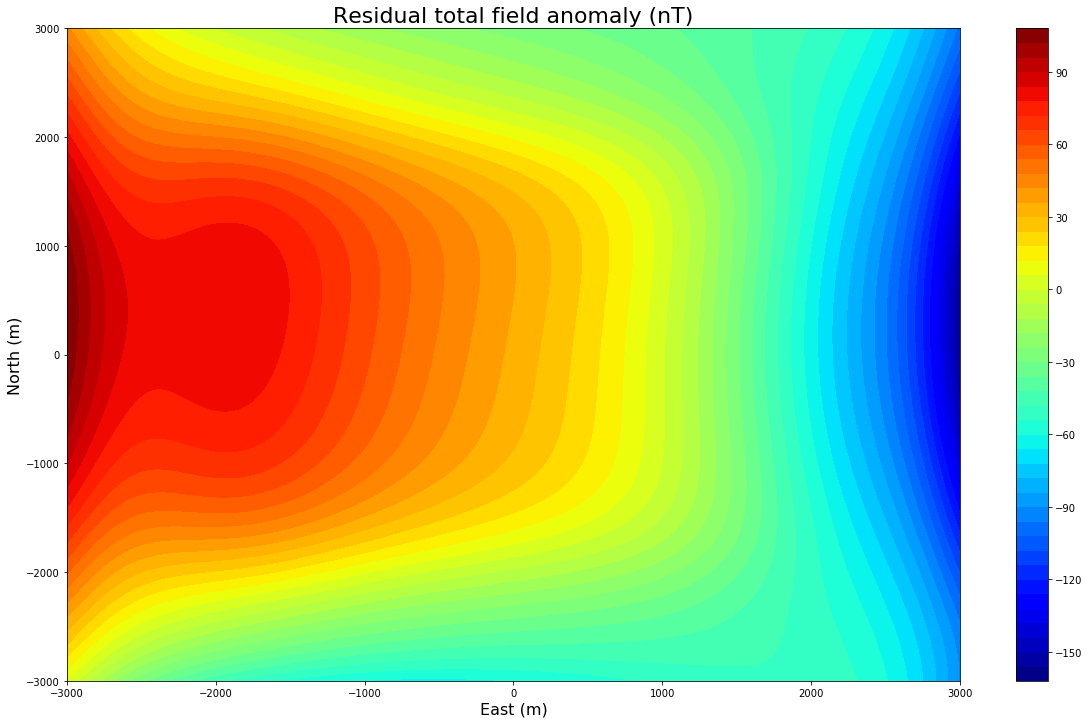

In [20]:
# Plotting the residual file
plt.figure(figsize=(20,12))
plt.title('Residual total field anomaly (nT)', fontsize = 22)
fig5 = plt.contourf(X, Y, tfa - TFA_up, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 16)
plt.ylabel('North (m)', fontsize = 16)
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(fig5)
plt.show()

# Example 2 - Gravity data

In [ ]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-2000., 2000., npts)
y = np.copy(x)
z = -20.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [ ]:
#Informations about the rectangular prisms that we will use
prism1 = [-1100., -300., 0., 800., 250., 850., 1.8475]
prism2 = [700., 1500., -1400., 600., 2000., 3500., 2.67]

In [ ]:
# Calculate the total field anomaly
gz1 = gmc.prism_gz(X, Y, z, prism1)
gz2 = gmc.prism_gz(X, Y, z, prism2)
gz = gz1 + gz2
gz3 = gz - 0.3086*500

In [ ]:
#Calculating the wavenumbers
u = 2.0*np.pi* np.fft.fftfreq(gz.shape[0], x[1] - x[0])
v = 2.0*np.pi* np.fft.fftfreq(gz.shape[1], y[1] - y[0])
U,V = np.meshgrid(u,v)

# Filtering the data
D = 1000. # meters # H = 800 - z > 0 - UPWARD!
Gz = np.fft.fft2(gz) # Fourier transform for total field
K_up = np.exp(-(D-z)*(np.sqrt(U**2 + V**2))) # Filter calculation
Gz_cont = Gz*K_up # Applieding the filter
Gz_upward = np.real(np.fft.ifft2(Gz_cont)) # Applieding the inverse Fourier

In [ ]:
# Plot the map for total field anomaly
plt.close('all')
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Gravity anomaly (mGal) - $1^o$ prism')
g1 = plt.contourf(X, Y, gz1, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g1)

plt.subplot(2,2,2)
plt.title('Gravity anomaly (mGal) - $2^o$ prism')
g2 = plt.contourf(X, Y, gz3, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g2)

plt.subplot(2,2,3)
plt.title('Gravity anomaly (mGal)')
g3 = plt.contourf(X, Y, gz, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g3)

plt.subplot(2,2,4)
plt.title('Continuated gravity anomaly (mGal)')
g4 = plt.contourf(X, Y, Gz_upward, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar(g4)

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Residual gravity anomaly (mGal)')
plt.contourf(X, Y, gz - Gz_upward, 50, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()

plt.show()

In [ ]:
# Reading the file
East, North, Elev, Freeair, Bouguer = np.loadtxt('north-grav.dat', skiprows=1, usecols=(0, 1, 2, 4, 5), unpack=True)

In [ ]:
# Reshape all data
UTMX = np.linspace(East[0], East[-1], 101)
UTMY = np.linspace(North[0], North[-1], 201)
shape = (UTMY.size, UTMX.size)
# Grid calculation
Xgrid, Ygrid = np.meshgrid(UTMX, UTMY)

# Elevation, Freeair anomaly and Bouguer anomaly
Elev = Elev.reshape(shape)
Freeair = Freeair.reshape(shape)
Bouguer = Bouguer.reshape(shape)

In [ ]:
#Calculating the wavenumbers
kx = 2.0*np.pi* np.fft.fftfreq(Bouguer.shape[1], UTMX[1] - UTMX[0])
ky = 2.0*np.pi* np.fft.fftfreq(Bouguer.shape[0], UTMY[1] - UTMY[0])
KX, KY = np.meshgrid(kx, ky)

In [ ]:
# Filtering the data
Distance = 20.*np.max(Elev)
FA_trans = np.fft.fft2(Freeair) 
BG_trans = np.fft.fft2(Bouguer)
K = np.exp(-(Distance-Elev)*(np.sqrt(KX**2 + KY**2)))
print 'Maximum elevation value (in meters):', np.max(Elev)
print 'Distance data will be continuated (in meters):', Distance

In [ ]:
# Freeair anomaly filtered
FA_cont = FA_trans*K
Freeair_upward = np.real(np.fft.ifft2(FA_cont))

# Bouguer anomaly filtered
BG_cont = BG_trans*K
Bouguer_upward = np.real(np.fft.ifft2(BG_cont))

In [ ]:
print 'From original values (in mGal):'
print '* Freeair anomaly:', np.max(Freeair),'/', np.min(Freeair)
print '* Bouguer anomaly:', np.max(Bouguer),'/', np.min(Bouguer)
print
print 'From continuated values (in mGal):'
print '* Freeair upward:', np.max(Freeair_upward),'/', np.min(Freeair_upward)
print '* Bouguer upward:', np.max(Bouguer_upward),'/', np.min(Bouguer_upward)

In [ ]:
# Setting color scale
facor = np.linspace(Freeair.min(), Freeair.max(), 20)
bgcor = np.linspace(Bouguer.min(), Bouguer.max(), 20)

In [ ]:
plt.close('all')
plt.figure(figsize = (16,20))

plt.subplot(2,2,1)
plt.title('Freeair original data (mGal)')
f1 = plt.contourf(Xgrid, Ygrid, Freeair, facor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f1)
plt.clim(np.min(facor), np.max(facor))

plt.subplot(2,2,2)
plt.title('Freeair continuated data (mGal)')
f2 = plt.contourf(Xgrid, Ygrid, Freeair_upward, facor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f2)
plt.clim(np.min(facor), np.max(facor))

plt.subplot(2,2,3)
plt.title('Bouguer original data (mGal)')
f3 = plt.contourf(Xgrid, Ygrid, Bouguer, bgcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f3)
plt.clim(np.min(bgcor), np.max(bgcor))

plt.subplot(2,2,4)
plt.title('Bouguer continuated data (mGal)')
f4 = plt.contourf(Xgrid, Ygrid, Bouguer_upward, bgcor, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar(f4)
plt.clim(np.min(bgcor), np.max(bgcor))

plt.savefig('figs/gravityanomaly.png')
plt.show()